# Lesson 2 Exercise 1: Creating Normalized Tables

## In this exercise we are going to walk through the basics of modeling data in normalized form. We will create tables in PostgreSQL, insert rows of data, and do simple JOIN SQL queries to show how these mutliple tables can work together. 

#### Where you see ##### you will need to fill in code.

Note: __Do not__ click the blue Preview button in the lower task bar

#### Import the library 
Note: An error might popup after this command has exectuted. If it does, read it carefully before ignoring. 

In [1]:
import psycopg2

__Create a connection to the database, get a cursor, and set autocommit to true)__

In [2]:
try: 
    conn = psycopg2.connect("host=127.0.0.1 dbname=udacity_de user=postgres password=postgres")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get cursor to the Database")
    print(e)
conn.set_session(autocommit=True)

#### Let's imagine we have a table called Music Store. 

`Table Name: music_store
column 0: Transaction Id
column 1: Customer Name
column 2: Cashier Name
column 3: Year 
column 4: Albums Purchased`


## Now to translate this information into a CREATE Table Statement and insert the data

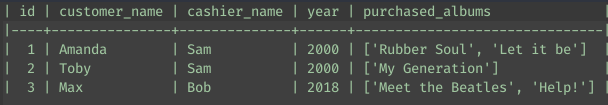

In [9]:
# TO-DO: Add the CREATE Table Statement and INSERT statements to add the data in the table
def execute_query(*args, error=None, **kwargs):
    try:
        cur.execute(*args, **kwargs)
    except psycopg2.Error as e:
        if error:
            print(error)
        print(e)

def drop_table(name):
    execute_query(f"DROP TABLE IF EXISTS {name}", error="Error: dropping table")

def create_table(name, fields_desc):
    execute_query(f"CREATE TABLE IF NOT EXISTS {name} ({fields_desc})", error="Error: Issue creating table")

def insert_into_music_store(id, customer, cashier, year, albums):
    execute_query("INSERT INTO music_store (id, customer_name, cashier_name, year, purchased_albums) \
                  VALUES (%s, %s, %s, %s, %s)", \
                  (id, customer, cashier, year, albums), error="Error: Inserting Rows")

create_table("music_store", "id integer, customer_name varchar, cashier_name varchar, year integer, purchased_albums text")
insert_into_music_store(1, 'Amanda', 'Sam', 2000, ['Rubber Soul', 'Let it be'])
insert_into_music_store(2, 'Toby', 'Sam', 2000, ['My Generation'])
insert_into_music_store(3, 'Max', 'Bob', 2018, ['Meet the Beatles', 'Help!'])
    
execute_query("SELECT * FROM music_store", error="Error: SELECT *")

rows = cur.fetchall()
for row in rows:
   print(row)

(1, 'Amanda', 'Sam', 2000, '{"Rubber Soul","Let it be"}')
(2, 'Toby', 'Sam', 2000, '{"My Generation"}')
(3, 'Max', 'Bob', 2018, '{"Meet the Beatles",Help!}')


#### Moving to 1st Normal Form (1NF)

### This data has not been normalized. To get this data into 1st normal form, you need to remove any collections or list of data and break up the list of songs into individual rows. 


In [11]:
## TO-DO: Complete the CREATE table statements and INSERT statements

create_table("music_store_2", "transaction_id integer, customer_name varchar, cashier_name varchar, year integer, purchased_album varchar")

def insert_into_music_store_2(id, customer, cashier, year, album):
    execute_query("INSERT INTO music_store_2 (transaction_id, customer_name, cashier_name, year, purchased_album) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (id, customer, cashier, year, album), error="Error: Inserting Rows")

insert_into_music_store_2(1, 'Amanda', 'Sam', 2000, 'Rubber Soul')
insert_into_music_store_2(1, 'Amanda', 'Sam', 2000, 'Let it be')
insert_into_music_store_2(2, 'Toby', 'Sam', 2000, 'My Generation')
insert_into_music_store_2(3, 'Max', 'Bob', 2018, 'Meet the Beatles')
insert_into_music_store_2(3, 'Max', 'Bob', 2018, 'Help!')

execute_query("SELECT * FROM music_store_2", error="Error: SELECT *")

rows = cur.fetchall()
for row in rows:
   print(row)

(1, 'Amanda', 'Sam', 2000, 'Rubber Soul')
(1, 'Amanda', 'Sam', 2000, 'Let it be')
(2, 'Toby', 'Sam', 2000, 'My Generation')
(3, 'Max', 'Bob', 2018, 'Meet the Beatles')
(3, 'Max', 'Bob', 2018, 'Help!')


#### Moving to 2nd Normal Form (2NF)
You have now moved the data into 1NF, which is the first step in moving to 2nd Normal Form. The table is not yet in 2nd Normal Form. While each of the records in the table is unique, our Primary key (transaction id) is not unique. 

### Break up the table into two tables, transactions and albums sold. 


In [14]:
create_table("transactions", "id integer, customer_name varchar, cashier_name varchar")
create_table("albums_sold", "transaction_id integer, year integer, purchased_album varchar")

def insert_transaction(id, customer, cashier):
    execute_query("INSERT INTO transactions (id, customer_name, cashier_name) \
                   VALUES (%s, %s, %s)", \
                  (id, customer, cashier), error="Error: Inserting Rows")
    
def insert_albums_sold(transaction_id, year, album):
    execute_query("INSERT INTO albums_sold (transaction_id, year, purchased_album) \
                   VALUES (%s, %s, %s)",
                 (transaction_id, year, album))

    
insert_transaction(1, "Amanda", "Sam")
insert_transaction(2, "Toby", "Sam")
insert_transaction(3, "Max", "Bob")
insert_albums_sold(1, 2000, "Rubber Soul")
insert_albums_sold(1, 2000, "Let it be")
insert_albums_sold(2, 2000, 'My Generation')
insert_albums_sold(3, 2018, 'Meet the Beatles')
insert_albums_sold(3, 2018, 'Help!')

print("\nTable: transactions\n")
execute_query("SELECT * FROM transactions")
rows = cur.fetchall()
for row in rows:
    print(row)
   
print("\nTable: albums_sold\n")
execute_query("SELECT * from albums_sold")

row = cur.fetchall()
for row in rows:
    print(row)

(1, 'Amanda', 'Sam')
(2, 'Toby', 'Sam')
(3, 'Max', 'Bob')

Table: albums_sold

(1, 'Amanda', 'Sam')
(2, 'Toby', 'Sam')
(3, 'Max', 'Bob')


### Do a `JOIN` on these tables to get all the information in the original first Table. 

In [15]:
## TO-DO: Complete the join on the transactions and album_sold tables

execute_query("SELECT * FROM albums_sold JOIN transactions on transaction_id = id")
rows = cur.fetchall()
for row in rows:
    print(row)

(1, 2000, 'Rubber Soul', 1, 'Amanda', 'Sam')
(1, 2000, 'Let it be', 1, 'Amanda', 'Sam')
(2, 2000, 'My Generation', 2, 'Toby', 'Sam')
(3, 2018, 'Meet the Beatles', 3, 'Max', 'Bob')
(3, 2018, 'Help!', 3, 'Max', 'Bob')


#### Moving to 3rd Normal Form (3NF)
Check our table for any transitive dependencies. 
_HINT:_ Check the table for any transitive dependencies. _Transactions_ can remove _Cashier Name_ to its own table, called _Employees_, which will leave us with 3 tables. 


### Create the third table named *employees* to move to 3rd NF. 


In [17]:
create_table("transactions_2", "id integer, customer_name varchar, employee_id integer")
create_table("employees", "id integer, employee_name varchar")

def insert_transaction(id, customer_name, employee_id):
    execute_query("INSERT INTO transactions_2 (id, customer_name, employee_id) \
                   VALUES (%s, %s, %s)", \
                 (id, customer_name, employee_id))

def insert_employee(id, employee_name):
    execute_query("INSERT INTO employees (id, employee_name) \
                   VALUES (%s, %s)", \
                   (1, "Sam"))

insert_transaction(1, "Amanda", 1)
insert_transaction(2, "Toby", 1)
insert_transaction(3, "Max", 2)
insert_employee(1, "Sam")
insert_employee(2, "Bob")

print("Table: transactions2\n")
execute_query("SELECT * FROM transactions_2", error="Error: SELECT *")
rows = cur.fetchall()
for row in rows:
    print(row)

print("\nTable: albums_sold\n")
execute_query("SELECT * FROM albums_sold")
for row in rows:
    print(row)

print("\nTable: employees\n")
execute_query("SELECT * FROM employees")
for row in rows:
    print(row)

Table: transactions2

(1, 'Amanda', 1)
(2, 'Toby', 1)
(3, 'Max', 2)

Table: albums_sold

(1, 'Amanda', 1)
(2, 'Toby', 1)
(3, 'Max', 2)

Table: employees

(1, 'Amanda', 1)
(2, 'Toby', 1)
(3, 'Max', 2)


### Complete the last two `JOIN` on these 3 tables so we can get all the information we had in our first Table. 

In [18]:
execute_query("""
SELECT * from (transactions_2 JOIN albums_sold ON \
               transactions_2.id = albums_sold.transaction_id) JOIN \
               employees ON employee_id=employees.id
""")
rows = cur.fetchall()
for row in rows:
    print(row)

(1, 'Amanda', 1, 1, 2000, 'Rubber Soul', 1, 'Sam')
(1, 'Amanda', 1, 1, 2000, 'Let it be', 1, 'Sam')
(2, 'Toby', 1, 2, 2000, 'My Generation', 1, 'Sam')
(1, 'Amanda', 1, 1, 2000, 'Rubber Soul', 1, 'Sam')
(1, 'Amanda', 1, 1, 2000, 'Let it be', 1, 'Sam')
(2, 'Toby', 1, 2, 2000, 'My Generation', 1, 'Sam')
(1, 'Amanda', 1, 1, 2000, 'Rubber Soul', 1, 'Sam')
(1, 'Amanda', 1, 1, 2000, 'Let it be', 1, 'Sam')
(2, 'Toby', 1, 2, 2000, 'My Generation', 1, 'Sam')
(1, 'Amanda', 1, 1, 2000, 'Rubber Soul', 1, 'Sam')
(1, 'Amanda', 1, 1, 2000, 'Let it be', 1, 'Sam')
(2, 'Toby', 1, 2, 2000, 'My Generation', 1, 'Sam')


### Your output for the above cell should be:

(1, 'Amanda', 1, 2000, 1, 1, 'Rubber Soul', 1, 'Sam')<br>
(1, 'Amanda', 1, 2000, 2, 1, 'Let it Be', 1, 'Sam')<br>
(2, 'Toby', 1, 2000, 3, 2, 'My Generation', 1, 'Sam')<br>
(3, 'Max', 2, 2018, 4, 3, 'Meet the Beatles', 2, 'Bob')<br>
(3, 'Max', 2, 2018, 5, 3, 'Help!', 2, 'Bob')<br>


### Awesome work!! You have Normalized the dataset! 

### And finally close your cursor and connection. 

In [9]:
for table in ["music_store", "music_store_2", "albums_sold", "employees",
              "transactions", "transactions"]
try: 
    cur.execute("DROP table music_store")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table music_store2")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table albums_sold")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table employees")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table transactions")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table transactions2")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

### And finally close your cursor and connection. 

In [10]:
cur.close()
conn.close()